In [791]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

np.random.seed(42)

In [792]:
TARGET_COLUMN_NAME = "Status"

df = pd.read_csv("./dataset/Loan_default.csv")
n_class = df["Status"].nunique()

df

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,0.2571,9960.00,180.0,not_neg,not_int,not_lpsm,608000.0,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,0.8544,0.00,360.0,not_neg,not_int,not_lpsm,788000.0,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,0.0816,1226.64,180.0,not_neg,not_int,not_lpsm,728000.0,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,0.5824,4323.33,180.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [793]:
df["Status"].unique()

array([1, 0])

In [794]:
np.random.seed(42)
# df = pd.concat([df, A_df, O_df], ignore_index=True)
# df

In [795]:
float_columns = []
for col in df.columns:
    if df[col].dtype == 'float64':
        float_columns.append(col)
float_columns

['rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'LTV',
 'dtir1']

In [796]:
text_columns = ["loan_type", "loan_purpose", "credit_type", "co-applicant_credit_type", "age"]

In [797]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [798]:
df = df[text_columns + float_columns + [TARGET_COLUMN_NAME]]

In [799]:
for col in text_columns:
    df = pd.get_dummies(df, columns=[col])

for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [800]:
df

,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,LTV,dtir1,Status,loan_type_type1,loan_type_type2,loan_type_type3,loan_purpose_p1,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,credit_type_CIB,credit_type_CRIF,credit_type_EQUI,credit_type_EXP,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,age_25-34,age_35-44,age_45-54,age_55-64,age_65-74,age_<25,age_>74
0,NaN,NaN,NaN,360.0,118000.0,1740.0,98.728814,45.0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0
1,NaN,NaN,NaN,360.0,NaN,4980.0,NaN,NaN,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,4.560,0.2000,595.00,360.0,508000.0,9480.0,80.019685,46.0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
3,4.250,0.6810,NaN,360.0,658000.0,11880.0,69.376900,42.0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0
4,4.000,0.3042,0.00,360.0,758000.0,10440.0,91.886544,39.0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,3.125,0.2571,9960.00,180.0,608000.0,7860.0,71.792763,48.0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
148666,5.190,0.8544,0.00,360.0,788000.0,7140.0,74.428934,15.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
148667,3.125,0.0816,1226.64,180.0,728000.0,6900.0,61.332418,49.0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0
148668,3.500,0.5824,4323.33,180.0,278000.0,7140.0,70.683453,29.0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0


In [801]:
df = df[list(set(df.columns)-set([TARGET_COLUMN_NAME])) + [TARGET_COLUMN_NAME]]
df

,loan_purpose_p1,loan_type_type3,loan_type_type1,property_value,loan_purpose_p4,co-applicant_credit_type_EXP,age_>74,loan_purpose_p2,credit_type_EQUI,income,Upfront_charges,loan_type_type2,co-applicant_credit_type_CIB,age_25-34,age_35-44,Interest_rate_spread,credit_type_CRIF,term,dtir1,credit_type_CIB,loan_purpose_p3,credit_type_EXP,age_55-64,age_45-54,age_<25,rate_of_interest,age_65-74,LTV,Status
0,1,0,1,118000.0,0,0,0,0,0,1740.0,NaN,0,1,1,0,NaN,0,360.0,45.0,0,0,1,0,0,0,NaN,0,98.728814,1
1,1,0,0,NaN,0,1,0,0,1,4980.0,NaN,1,0,0,0,NaN,0,360.0,NaN,0,0,0,1,0,0,NaN,0,NaN,1
2,1,0,1,508000.0,0,0,0,0,0,9480.0,595.00,0,1,0,1,0.2000,0,360.0,46.0,0,0,1,0,0,0,4.560,0,80.019685,0
3,0,0,1,658000.0,1,0,0,0,0,11880.0,NaN,0,1,0,0,0.6810,0,360.0,42.0,0,0,1,0,1,0,4.250,0,69.376900,0
4,1,0,1,758000.0,0,1,0,0,0,10440.0,0.00,0,0,1,0,0.3042,1,360.0,39.0,0,0,0,0,0,0,4.000,0,91.886544,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,0,1,608000.0,0,1,0,0,0,7860.0,9960.00,0,0,0,0,0.2571,0,180.0,48.0,1,1,0,1,0,0,3.125,0,71.792763,0
148666,1,0,1,788000.0,0,0,0,0,0,7140.0,0.00,0,1,1,0,0.8544,0,360.0,15.0,1,0,0,0,0,0,5.190,0,74.428934,0
148667,0,0,1,728000.0,1,1,0,0,0,6900.0,1226.64,0,0,0,0,0.0816,0,180.0,49.0,1,0,0,0,1,0,3.125,0,61.332418,0
148668,0,0,1,278000.0,1,1,0,0,0,7140.0,4323.33,0,0,0,0,0.5824,0,180.0,29.0,0,0,1,1,0,0,3.500,0,70.683453,0


In [802]:
df[TARGET_COLUMN_NAME].nunique()

2

In [803]:
df = df.fillna(0)
print("Size", df.shape[0])
data = df.to_numpy()

Size 148670


In [804]:
df[TARGET_COLUMN_NAME].nunique()

2

In [805]:
def train_test_split(data, train_split_ratio):
    np.random.shuffle(data)
    train_count = int(data.shape[0] * train_split_ratio)
    train = data[:train_count]
    test = data[train_count:]
    X_train = train[:, :-1].astype(float)
    y_train = train[:, -1]
    X_test = test[:, :-1].astype(float)
    y_test = test[:, -1]
    return X_train, y_train, X_test, y_test

In [806]:
def binary_cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Calculating loss
    loss = -1/m * (np.dot(y_true.T, np.log(y_pred)) + np.dot((1 - y_true).T, np.log(1 - y_pred)))

    return loss

In [807]:
X_train, y_train, X_test, y_test = train_test_split(data, train_split_ratio=0.9)
X_train, y_train, X_test, y_test

(array([[ 0.        ,  0.        ,  0.        , ...,  4.99      ,
          0.        , 84.42028986],
        [ 0.        ,  0.        ,  1.        , ...,  3.99      ,
          0.        , 88.24626866],
        [ 0.        ,  0.        ,  1.        , ...,  3.99      ,
          1.        , 19.27966102],
        ...,
        [ 0.        ,  0.        ,  1.        , ...,  3.375     ,
          0.        , 39.49353448],
        [ 1.        ,  0.        ,  1.        , ...,  6.5       ,
          0.        , 83.203125  ],
        [ 0.        ,  0.        ,  1.        , ...,  4.125     ,
          0.        , 78.37171053]]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  1.        , ...,  0.        ,
          0.        , 46.83353438],
        [ 0.        ,  0.        ,  1.        , ...,  5.        ,
          0.        , 38.04836895],
        ...,
        [ 1.   

In [808]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [809]:
uni = list(df[TARGET_COLUMN_NAME].unique())
y_train_true = np.array([y_train == u for u in uni]).T.astype(int)
y_train_true

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [810]:
uni

[np.int64(1), np.int64(0)]

In [811]:
y_test_true = np.array([y_test == u for u in uni]).T.astype(int)
y_test_true

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

In [812]:
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def ReLU(x):
#     return x * (x > 0)

# def tanh(x):
#     return np.tanh(x)

# def sigmoid_derivative(x):
#     return x * (1 - x)

# activation = sigmoid

# input_layer_neurons = 4
# hidden_layer_neurons = 5
# output_layer_neurons = 3

# weights_input_hidden = np.random.uniform(-1, 1, (input_layer_neurons, hidden_layer_neurons))
# bias_hidden = np.random.uniform(-1, 1, (1, hidden_layer_neurons))

# weights_hidden_output = np.random.uniform(-1, 1, (hidden_layer_neurons, output_layer_neurons))
# bias_output = np.random.uniform(-1, 1, (1, output_layer_neurons))

# epochs = 20
# learning_rate = 0.1

# for epoch in range(epochs):
#     #propagacja do przodu
#     hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
#     hidden_layer_output = activation(hidden_layer_input)

#     output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
#     predicted_output = activation(output_layer_input)

#     error = y_train_true - predicted_output
#     print(error)

In [813]:
import math

def ReLU(x):
    return x * (x > 0)

def tanh(x):
    return np.tanh(x)

def softmax(z):
    """
    Zwraca softmax wzdłuż ostatniego wymiaru (dla każdej próbki osobno).
    Stabilna wersja: odejmujemy max(z), by uniknąć overflow.
    """
    z_shifted = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z_shifted)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def softmax_cross_entropy(y_true, y_pred_prob):
    """
    Zakładamy:
      y_true: one-hot wektor (np. [0,0,1])
      y_pred_prob: prawdopodobieństwa z softmax (np. [0.1, 0.2, 0.7])
    Zwraca średni cross-entropy (loss) w całej mini-paczkce (tu: w całym zbiorze).
    """
    # Dodajemy mały epsilon, by uniknąć log(0)
    eps = 1e-9
    return -np.mean(np.sum(y_true * np.log(y_pred_prob + eps), axis=1))

def softmax_derivative(y_true, y_pred_prob):
    """
    Pochodna straty cross-entropy względem wyjścia softmax:
    dL/dz = (y_pred_prob - y_true)
    (to klasyczny wynik dla softmax + CE)
    """
    return (y_pred_prob - y_true) / y_true.shape[0]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sig_x):
    return sig_x * (1 - sig_x)


def tanh_derivative(x):
    """
    Compute the derivative of the hyperbolic tangent function.
    
    Parameters:
    x (float or np.array): Input value or array of values.
    
    Returns:
    float or np.array: The derivative of tanh at the input value(s).
    """
    tanh_x = np.tanh(x)
    return 1 - tanh_x**2


def xavier(n_in, n_out):
    return math.sqrt(6/(n_in+n_out))


def validate_train(X_test, y_test_true):
    z1 = np.dot(X_test, W1) + b1
    a1 = tanh(z1)

    z2 = np.dot(a1, W2) + b2
    y_pred_prob = softmax(z2)

    _max = y_pred_prob.max(axis=1, keepdims=True)
    y_pred = (y_pred_prob==_max).astype(int)

    loss = softmax_cross_entropy(y_test_true, y_pred_prob)

    return ((y_test_true==y_pred).sum(axis=1, keepdims=True)==n_class).sum() / y_pred.shape[0], loss


def apply_dropout(a, dropout_rate, training):
    if training:
        mask = np.random.rand(*a.shape) > dropout_rate
        return (a * mask) / (1 - dropout_rate)
    return a


input_layer_neurons = X_train.shape[1]
hidden_layer_neurons = input_layer_neurons * 2
output_layer_neurons = n_class

a = xavier(input_layer_neurons, output_layer_neurons)

W1 = np.random.uniform(-a, a, (input_layer_neurons, hidden_layer_neurons))
b1 = np.random.uniform(-a, a, (1, hidden_layer_neurons))

W2 = np.random.uniform(-a, a, (hidden_layer_neurons, output_layer_neurons))
b2 = np.random.uniform(-a, a, (1, output_layer_neurons))

epochs = 5
learning_rate = 0.1
beta1 = 0.9  # Współczynnik dla momentu pierwszego rzędu
beta2 = 0.999  # Współczynnik dla momentu drugiego rzędu
epsilon = 1e-8  # Mała wartość, aby zapobiec dzieleniu przez zero

# Inicjalizacja momentów
m_W1 = np.zeros_like(W1)
v_W1 = np.zeros_like(W1)
m_b1 = np.zeros_like(b1)
v_b1 = np.zeros_like(b1)

m_W2 = np.zeros_like(W2)
v_W2 = np.zeros_like(W2)
m_b2 = np.zeros_like(b2)
v_b2 = np.zeros_like(b2)

# Parametry zaktualizowane w czasie treningu
t = 0  # Licznik iteracji

history = {
    "validation_accuracy": [],
    "validation_loss": [],
    "loss": []
}
for epoch in range(epochs):
    t += 1

    # 1. Forward pass (warstwa ukryta -> warstwa wyjściowa)
    z1 = np.dot(X_train, W1) + b1
    a1 = tanh(z1) #tanh(z1)
    #a1 = apply_dropout(a1, dropout_rate=0.7, training=True)

    z2 = np.dot(a1, W2) + b2
    y_pred_prob = softmax(z2)

    loss = softmax_cross_entropy(y_train_true, y_pred_prob)

    d_z2 = softmax_derivative(y_train_true, y_pred_prob)

    dW2 = np.dot(a1.T, d_z2)
    db2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * tanh_derivative(a1) #tanh_derivative(a1)

    dW1 = np.dot(X_train.T, d_z1)
    db1 = np.sum(d_z1, axis=0, keepdims=True)

    m_W1 = beta1 * m_W1 + (1 - beta1) * dW1
    v_W1 = beta2 * v_W1 + (1 - beta2) * (dW1 ** 2)
    m_b1 = beta1 * m_b1 + (1 - beta1) * db1
    v_b1 = beta2 * v_b1 + (1 - beta2) * (db1 ** 2)

    m_W2 = beta1 * m_W2 + (1 - beta1) * dW2
    v_W2 = beta2 * v_W2 + (1 - beta2) * (dW2 ** 2)
    m_b2 = beta1 * m_b2 + (1 - beta1) * db2
    v_b2 = beta2 * v_b2 + (1 - beta2) * (db2 ** 2)

    # Korekcja biasu momentów
    m_W1_hat = m_W1 / (1 - beta1 ** t)
    v_W1_hat = v_W1 / (1 - beta2 ** t)
    m_b1_hat = m_b1 / (1 - beta1 ** t)
    v_b1_hat = v_b1 / (1 - beta2 ** t)

    m_W2_hat = m_W2 / (1 - beta1 ** t)
    v_W2_hat = v_W2 / (1 - beta2 ** t)
    m_b2_hat = m_b2 / (1 - beta1 ** t)
    v_b2_hat = v_b2 / (1 - beta2 ** t)

    # Aktualizacja wag i biasów
    W2 -= learning_rate * m_W2_hat / (np.sqrt(v_W2_hat) + epsilon)
    b2 -= learning_rate * m_b2_hat / (np.sqrt(v_b2_hat) + epsilon)

    W1 -= learning_rate * m_W1_hat / (np.sqrt(v_W1_hat) + epsilon)
    b1 -= learning_rate * m_b1_hat / (np.sqrt(v_b1_hat) + epsilon)

    validation_accuracy, validation_loss = validate_train(X_test, y_test_true)
    print(f"epoch {epoch+1}/{epochs}, loss: {loss} val accuracy: {validation_accuracy} val loss: {validation_loss}")
    history["validation_accuracy"].append(validation_accuracy)
    history["validation_loss"].append(validation_loss)
    history["loss"].append(loss)
    


epoch 1/5, loss: 0.9400633696171679 val accuracy: 0.7565077016210399 val loss: 1.650606130492114
epoch 2/5, loss: 1.676612989217394 val accuracy: 0.7780318826932131 val loss: 2.0408660259320563
epoch 3/5, loss: 2.0752004479188755 val accuracy: 0.857267774265151 val loss: 1.7314082838379432
epoch 4/5, loss: 1.7615237349054658 val accuracy: 0.857267774265151 val loss: 1.3143967526690346
epoch 5/5, loss: 1.3371683071615652 val accuracy: 0.857267774265151 val loss: 0.5419927346012196


Text(0.5, 1.0, 'validation accuracy')

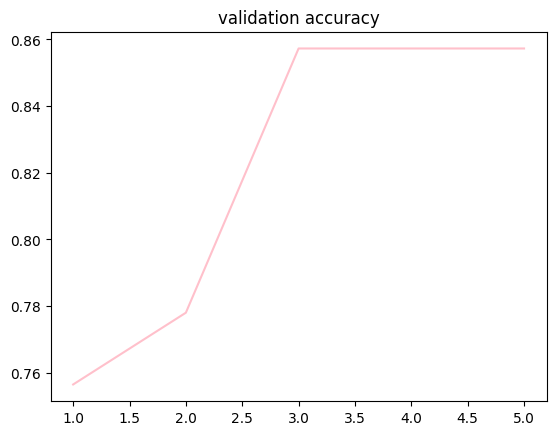

In [814]:
plt.plot(list(range(1, epochs+1)), history["validation_accuracy"], label="validation_accuracy", c="pink")
plt.title("validation accuracy")

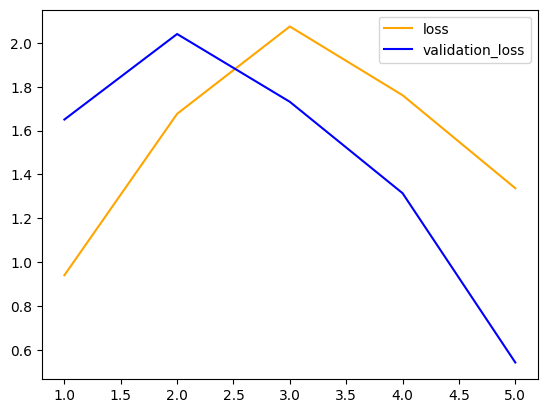

In [815]:
plt.plot(list(range(1, epochs+1)), history["loss"], label="loss", c="orange")
plt.plot(list(range(1, epochs+1)), history["validation_loss"], label="validation_loss", c="blue")
plt.legend()

In [816]:
z1 = np.dot(X_test, W1) + b1
a1 = tanh(z1)

z2 = np.dot(a1, W2) + b2
y_pred_prob = softmax(z2)

_max = y_pred_prob.max(axis=1, keepdims=True)
y_pred = (y_pred_prob==_max).astype(int)

((y_test_true==y_pred).sum(axis=1, keepdims=True)==n_class).sum() / y_pred.shape[0]

np.float64(0.857267774265151)